In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Load the Dataset

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 10s 0us/step


In [3]:

data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/3575811488_a31714472a.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5999024446_5721493894.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/7603036176_9e8967cd21.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3766264038_ea701c7131_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5007598545_90e08e81c1_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16100313047_c2e23cbb3d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8642943283_47e44d049d_m.jpg'),
 PosixPath('datasets/flower_photos/roses/9614492283_66020fb4eb_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8987479080_32ab912d10_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9160289562_ab2718d19b.jpg')]

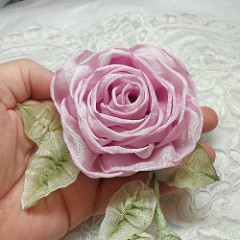

In [8]:
PIL.Image.open(str(roses[1]))

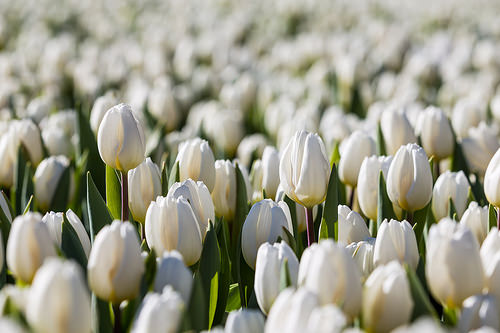

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/16100313047_c2e23cbb3d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8642943283_47e44d049d_m.jpg'),
 PosixPath('datasets/flower_photos/roses/9614492283_66020fb4eb_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8987479080_32ab912d10_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9160289562_ab2718d19b.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/16100313047_c2e23cbb3d_n.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(213, 320, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

### Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Preprocessing : Scale images

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

### Build convolutional neural network and train it

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 10s 23ms/step - loss: 1.4276 - accuracy: 0.3884
Epoch 2/30
86/86 [==============================] - 2s 23ms/step - loss: 0.9936 - accuracy: 0.6105
Epoch 3/30
86/86 [==============================] - 2s 23ms/step - loss: 0.7794 - accuracy: 0.7111
Epoch 4/30
86/86 [==============================] - 2s 23ms/step - loss: 0.5652 - accuracy: 0.7892
Epoch 5/30
86/86 [==============================] - 2s 23ms/step - loss: 0.3695 - accuracy: 0.8714
Epoch 6/30
86/86 [==============================] - 2s 23ms/step - loss: 0.2418 - accuracy: 0.9186
Epoch 7/30
86/86 [==============================] - 2s 23ms/step - loss: 0.1306 - accuracy: 0.9629
Epoch 8/30
86/86 [==============================] - 2s 23ms/step - loss: 0.0725 - accuracy: 0.9764
Epoch 9/30
86/86 [==============================] - 2s 23ms/step - loss: 0.0303 - accuracy: 0.9935
Epoch 10/30
86/86 [==============================] - 2s 24ms/step - loss: 0.0204 - accuracy: 0.9949
Epoch 11

In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 18ms/step - loss: 2.9528 - accuracy: 0.6460


[2.9528396129608154, 0.6459695100784302]

### The train set accuracy is 0.99 while the test accuracy is 0.65, thus the data is highly overfitting.

### We must do data augmentation to overcome overfitting

In [23]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 0s 14ms/step


array([[  1.7564967 ,  -0.61137575,   1.3851538 ,  -2.4162083 ,
         -1.495585  ],
       [ 17.726599  , -14.638651  ,  -4.5230923 , -20.829523  ,
         13.073451  ],
       [  2.0923471 ,  -7.635956  ,   6.6312385 ,  -3.226365  ,
          1.3859545 ],
       ...,
       [ -6.5692225 ,  -1.5319445 ,  -5.3698792 ,   3.495711  ,
          1.3571708 ],
       [ 21.64236   , -10.896781  ,  -8.12029   , -13.752686  ,
          4.749056  ],
       [ -3.87659   ,  -4.505498  ,  -0.14842635,  11.160206  ,
         -3.426515  ]], dtype=float32)

In [24]:
score = tf.nn.softmax(predictions[0])

In [25]:
np.argmax(score)

0

In [26]:
y_test[0]

1

### Improve Test accuracy using data augmentation

In [28]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

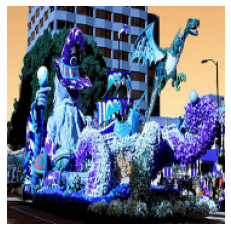

In [29]:
plt.axis('off')
plt.imshow(X[0])

### Newly generated image using data augmentation

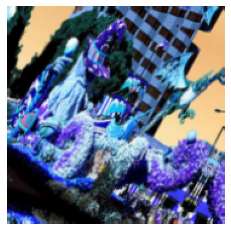

In [30]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

### Train the model using data augmentation and a drop out layer

In [31]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)    


Epoch 1/30
86/86 [==============================] - 4s 41ms/step - loss: 1.3506 - accuracy: 0.4339
Epoch 2/30
86/86 [==============================] - 3s 40ms/step - loss: 1.0787 - accuracy: 0.5785
Epoch 3/30
86/86 [==============================] - 3s 40ms/step - loss: 0.9622 - accuracy: 0.6239
Epoch 4/30
86/86 [==============================] - 4s 48ms/step - loss: 0.8831 - accuracy: 0.6595
Epoch 5/30
86/86 [==============================] - 3s 40ms/step - loss: 0.7962 - accuracy: 0.6966
Epoch 6/30
86/86 [==============================] - 3s 39ms/step - loss: 0.7558 - accuracy: 0.7111
Epoch 7/30
86/86 [==============================] - 3s 39ms/step - loss: 0.7319 - accuracy: 0.7209
Epoch 8/30
86/86 [==============================] - 3s 40ms/step - loss: 0.6895 - accuracy: 0.7293
Epoch 9/30
86/86 [==============================] - 3s 40ms/step - loss: 0.6748 - accuracy: 0.7402
Epoch 10/30
86/86 [==============================] - 3s 40ms/step - loss: 0.6460 - accuracy: 0.7569
Epoch 11/

In [32]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 14ms/step - loss: 1.0506 - accuracy: 0.7190


[1.0505797863006592, 0.7189542651176453]

### You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 71.8%